In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

import scipy.stats as stats

In [9]:
data = pd.read_csv("../fc.tsv",sep="\t",index_col=0)

In [10]:
data

,Timepoint,Stimuli,Sample,Cell Size,Cell Circularity,Cell Aspect Ratio,Cell Tracker Intensity,PI Intensity,AnexinV Intensity
0_2G3,3,G,2,11750,113.2539,2.8375,21192.0999,2951.6684,10590.6212
1_2G3,3,G,2,61,512.9727,61.0000,17836.5246,2907.2951,8491.5246
2_2G3,3,G,2,12,2565.8500,12.0000,18353.1667,2925.5833,8690.5833
3_2G3,3,G,2,23,1351.6133,23.0000,19101.6087,2961.4783,8673.8261
4_2G3,3,G,2,2,10000.0000,2.0000,19001.0000,2935.5000,8735.5000
...,...,...,...,...,...,...,...,...,...
4592_4B46,46,B,4,216,9413.2491,1.0487,14314.2315,4481.2037,27472.5972
4593_4B46,46,B,4,370,4905.5990,3.0213,12515.4270,6447.3568,29679.3784
4594_4B46,46,B,4,157,8635.1936,1.4828,14121.9427,15047.1401,26821.1465
4595_4B46,46,B,4,19,10000.0000,1.2733,20725.6316,46356.0526,26550.7895


In [11]:
attrs = ["Cell Size", "Cell Circularity", "Cell Aspect Ratio", 
         "Cell Tracker Intensity", "PI Intensity", "AnexinV Intensity"]

In [20]:
data_log = np.log10(data[attrs])
print(data_log.shape)
data_log = data_log[(np.abs(stats.zscore(data_log)) < 3).all(axis=1)]
print(data_log.shape)
data = data.loc[data_log.index]


(25577941, 6)
(24265068, 6)


In [37]:
data = data.loc[data_log.index]


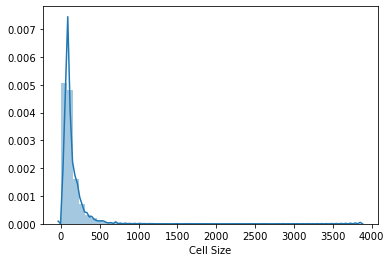

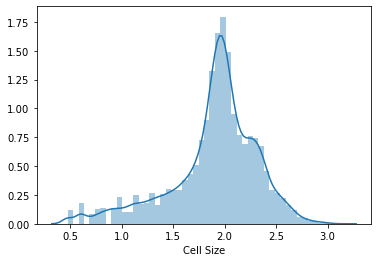

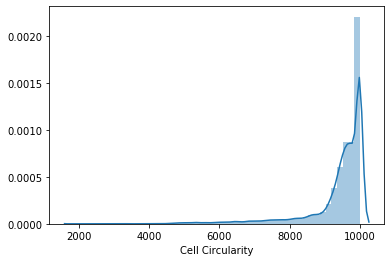

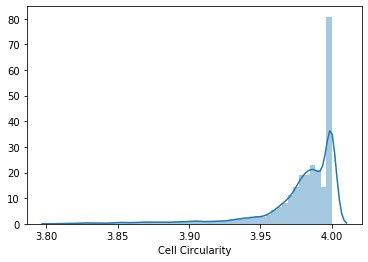

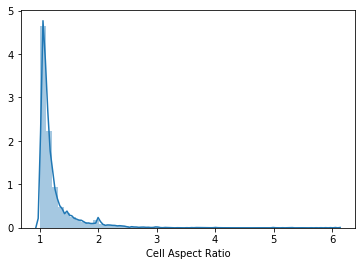

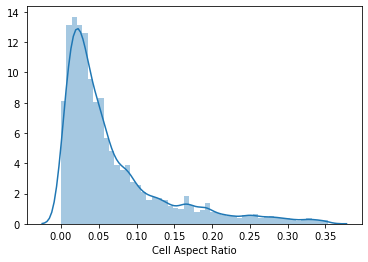

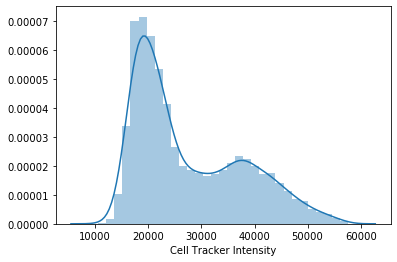

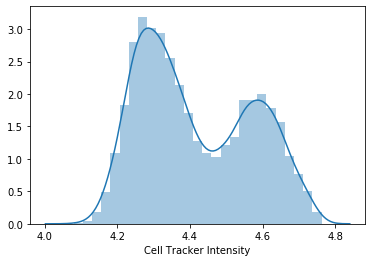

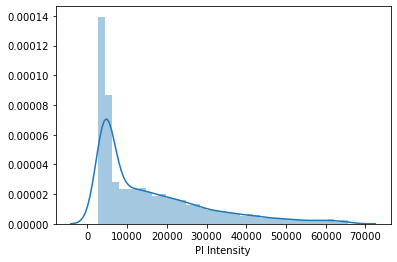

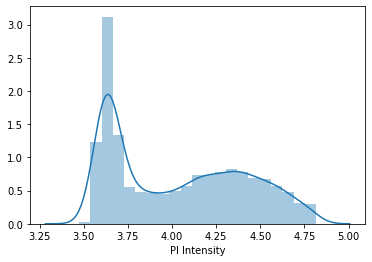

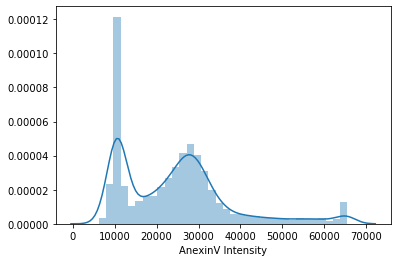

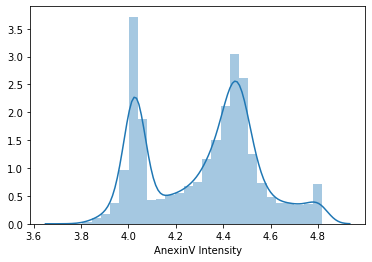

In [28]:
for i in attrs:
    f = plt.figure()
    sns.distplot(data[i].sample(10000))
    plt.savefig(f"../figures/{''.join(i.split())}_eda_dist.png")
    plt.savefig(f"../figures/{''.join(i.split())}_eda_dist.pdf")
    f = plt.figure()
    sns.distplot((data_log[i]).sample(10000))
    plt.savefig(f"../figures/{''.join(i.split())}_eda_log10_dist.png")
    plt.savefig(f"../figures/{''.join(i.split())}_eda_log10_dist.pdf")

In [49]:
meta = pd.read_csv("meta.tsv",sep="\t", index_col=0)
data_log = pd.concat((data_log,meta.loc[data_log.index]), axis=1)

## Create timepoint-by-attribute hexplot  

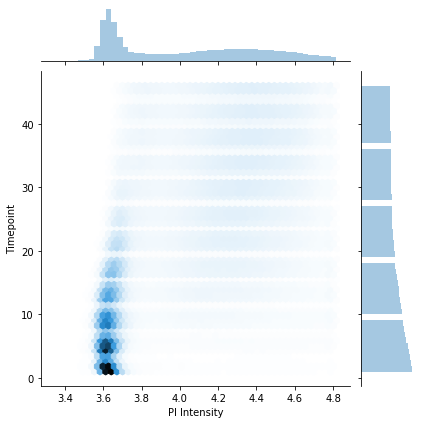

In [38]:
sns.jointplot(data_log["PI Intensity"], data["Timepoint"], kind="hex")

In [72]:
# import matplotlib.pyplot as plt
# import matplotlib.gridspec as gridspec
# import seaborn as sns
# import numpy as np

# class SeabornFig2Grid():

#     def __init__(self, seaborngrid, fig,  subplot_spec):
#         self.fig = fig
#         self.sg = seaborngrid
#         self.subplot = subplot_spec
#         if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
#             isinstance(self.sg, sns.axisgrid.PairGrid):
#             self._movegrid()
#         elif isinstance(self.sg, sns.axisgrid.JointGrid):
#             self._movejointgrid()
#         self._finalize()

#     def _movegrid(self):
#         """ Move PairGrid or Facetgrid """
#         self._resize()
#         n = self.sg.axes.shape[0]
#         m = self.sg.axes.shape[1]
#         self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
#         for i in range(n):
#             for j in range(m):
#                 self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

#     def _movejointgrid(self):
#         """ Move Jointgrid """
#         h= self.sg.ax_joint.get_position().height
#         h2= self.sg.ax_marg_x.get_position().height
#         r = int(np.round(h/h2))
#         self._resize()
#         self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

#         self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
#         self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
#         self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

#     def _moveaxes(self, ax, gs):
#         #https://stackoverflow.com/a/46906599/4124317
#         ax.remove()
#         ax.figure=self.fig
#         self.fig.axes.append(ax)
#         self.fig.add_axes(ax)
#         ax._subplotspec = gs
#         ax.set_position(gs.get_position(self.fig))
#         ax.set_subplotspec(gs)

#     def _finalize(self):
#         plt.close(self.sg.fig)
#         self.fig.canvas.mpl_connect("resize_event", self._resize)
#         self.fig.canvas.draw()

#     def _resize(self, evt=None):
#         self.sg.fig.set_size_inches(self.fig.get_size_inches())

# #f, ax = plt.subplots(nrows=1,ncols=2,squeeze=False)
# fig = plt.figure(figsize=(13,8))

# genos = {j:i for i,j in enumerate(data_log["Genotype"].unique())}
# g = []
# for ind, val in data_log.groupby("Genotype"):
#     g.append(sns.jointplot(val["PI Intensity"], val["Timepoint"], kind="hex",))
#     g[-1].fig.suptitle(ind)
    
# gs = gridspec.GridSpec(1, 2)
# SeabornFig2Grid(g[0], fig, gs[0])
# SeabornFig2Grid(g[1], fig, gs[1])

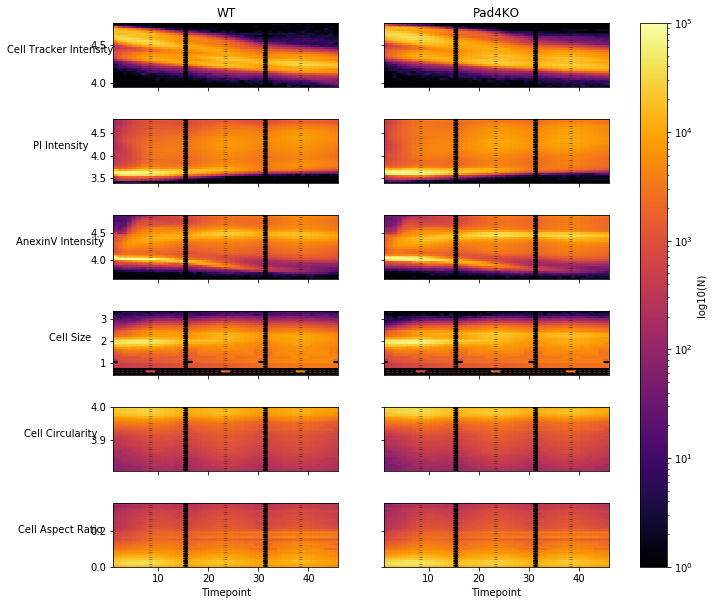

In [152]:
attrs = ["Cell Tracker Intensity", "PI Intensity", "AnexinV Intensity", 
         "Cell Size", "Cell Circularity", "Cell Aspect Ratio"]
x = data_log["Timepoint"]
#y = data_log["PI Intensity"]
xmin = x.min()
xmax = x.max()
# ymin = y.min()
# ymax = y.max()
genos = {j:i for i,j in enumerate(data_log["Genotype"].unique())}

fig, axs = plt.subplots(nrows=len(attrs),ncols=2, sharey='row',sharex=True, 
                        figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
for ind, val in data_log.groupby("Genotype"): #"Stimuli"):
    
    for a_ind,a in enumerate(attrs):
        ax = axs[a_ind, genos[ind]]
        x = val["Timepoint"]
        y = val[a]
        ymin = y.min()
        ymax = y.max()
        
        hb = ax.hexbin(x, y, gridsize=48, bins='log', cmap='inferno',vmin=1,vmax=1e5)
        ax.axis([xmin, xmax, ymin, ymax])
        
        if a_ind == len(attrs)-1:
            ax.set_xlabel("Timepoint")
        else: 
            ax.set_xlabel("")
        if a_ind == 0:
            ax.set_title(f"{ind}")
        if genos[ind] == 0:
            ax.set_ylabel(a, rotation=0, labelpad=30)
        
        #if a_ind == 0 and genos[ind] == 1:
cb = fig.colorbar(hb, ax=axs)
cb.set_label('log10(N)')


plt.savefig("../figures/tracking_log_features_over_time.png")
plt.savefig("../figures/tracking_log_features_over_time.pdf")



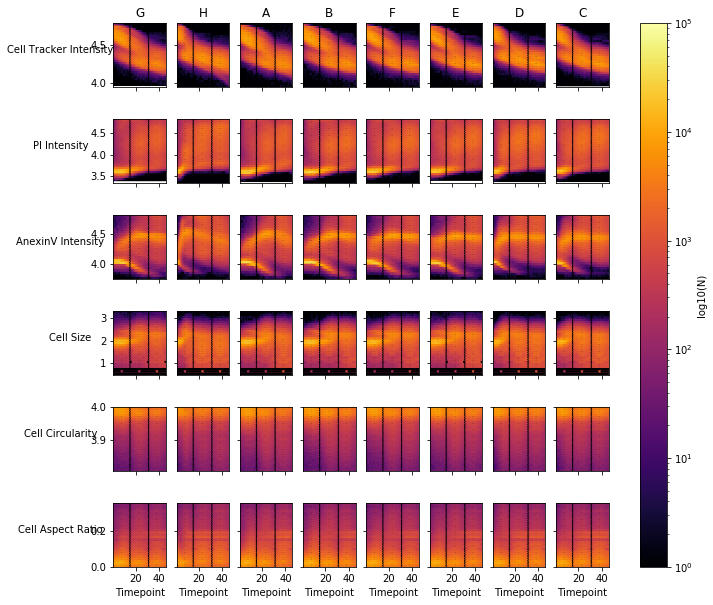

In [157]:
attrs = ["Cell Tracker Intensity", "PI Intensity", "AnexinV Intensity", 
         "Cell Size", "Cell Circularity", "Cell Aspect Ratio"]
x = data_log["Timepoint"]
#y = data_log["PI Intensity"]
xmin = x.min()
xmax = x.max()
# ymin = y.min()
# ymax = y.max()
stimuli = {j:i for i,j in enumerate(data_log["Stimuli"].unique())}

fig, axs = plt.subplots(nrows=len(attrs),ncols=len(stimuli), sharey='row',sharex=True, 
                        figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
for ind, val in data_log.groupby("Stimuli"): #"Stimuli"):
    
    for a_ind,a in enumerate(attrs):
        ax = axs[a_ind, stimuli[ind]]
        x = val["Timepoint"]
        y = val[a]
        ymin = y.min()
        ymax = y.max()
        
        hb = ax.hexbin(x, y, gridsize=48, bins='log', cmap='inferno',vmin=1,vmax=1e5)
        ax.axis([xmin, xmax, ymin, ymax])
        
        if a_ind == len(attrs)-1:
            ax.set_xlabel("Timepoint")
        else: 
            ax.set_xlabel("")
        if a_ind == 0:
            ax.set_title(f"{ind}")
        if stimuli[ind] == 0:
            ax.set_ylabel(a, rotation=0, labelpad=30)
        
        #if a_ind == 0 and stimuli[ind] == 1:
cb = fig.colorbar(hb, ax=axs)
cb.set_label('log10(N)')


plt.savefig("../figures/tracking_log_features_over_time_stimuli.png")
plt.savefig("../figures/tracking_log_features_over_time_stiumi.pdf")



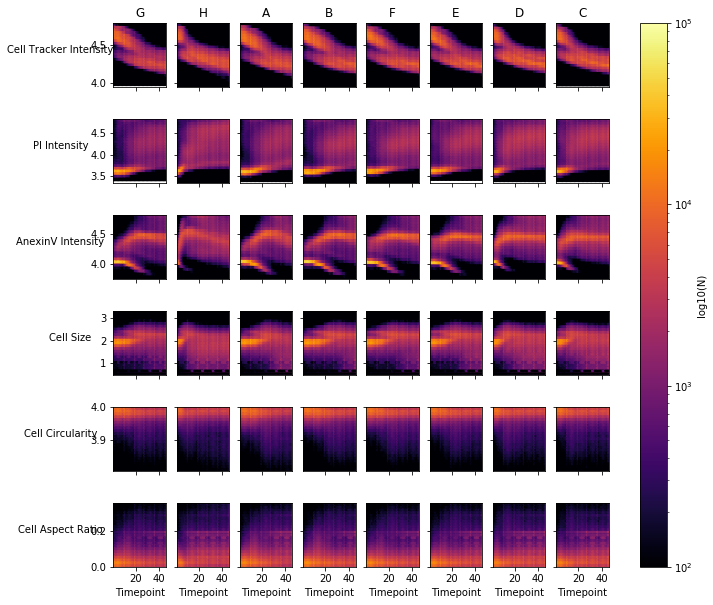

In [166]:
attrs = ["Cell Tracker Intensity", "PI Intensity", "AnexinV Intensity", 
         "Cell Size", "Cell Circularity", "Cell Aspect Ratio"]
x = data_log["Timepoint"]
#y = data_log["PI Intensity"]
xmin = x.min()
xmax = x.max()
# ymin = y.min()
# ymax = y.max()
stimuli = {j:i for i,j in enumerate(data_log["Stimuli"].unique())}

fig, axs = plt.subplots(nrows=len(attrs),ncols=len(stimuli), sharey='row',sharex=True, 
                        figsize=(10, 10))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
for ind, val in data_log.groupby("Stimuli"): #"Stimuli"):
    
    for a_ind,a in enumerate(attrs):
        ax = axs[a_ind, stimuli[ind]]
        x = val["Timepoint"]
        y = val[a]
        ymin = y.min()
        ymax = y.max()
        
        hb = ax.hexbin(x, y, gridsize=40, bins='log', cmap='inferno',vmin=100,vmax=1e5)
        ax.axis([xmin, xmax, ymin, ymax])
        
        if a_ind == len(attrs)-1:
            ax.set_xlabel("Timepoint")
        else: 
            ax.set_xlabel("")
        if a_ind == 0:
            ax.set_title(f"{ind}")
        if stimuli[ind] == 0:
            ax.set_ylabel(a, rotation=0, labelpad=30)
        
        #if a_ind == 0 and stimuli[ind] == 1:
cb = fig.colorbar(hb, ax=axs)
cb.set_label('log10(N)')


plt.savefig("../figures/tracking_log_features_over_time_stimuli.png")
plt.savefig("../figures/tracking_log_features_over_time_stiumi.pdf")



In [4]:
from src.config import DATA_DIR
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
meta = pd.read_csv(os.path.join(DATA_DIR, "meta.tsv"), sep="\t", index_col=0)

meta

,Timepoint,Stimuli,Sample,Genotype,Stimuli Names
0_2G3,3,G,2,WT,Nec1s
1_2G3,3,G,2,WT,Nec1s
2_2G3,3,G,2,WT,Nec1s
3_2G3,3,G,2,WT,Nec1s
4_2G3,3,G,2,WT,Nec1s
...,...,...,...,...,...
4592_4B46,46,B,4,WT,zVD
4593_4B46,46,B,4,WT,zVD
4594_4B46,46,B,4,WT,zVD
4595_4B46,46,B,4,WT,zVD


In [12]:
cells_per = meta.groupby(["Stimuli","Sample", "Timepoint"]).size()
cells_per.name = "cells"
cells_per = cells_per.reset_index()

,Stimuli,Sample,Timepoint,0
0,A,1,1,9804
1,A,1,2,10020
2,A,1,3,9891
3,A,1,4,9960
4,A,1,5,10053
...,...,...,...,...
4411,H,12,42,7826
4412,H,12,43,7897
4413,H,12,44,7914
4414,H,12,45,7464


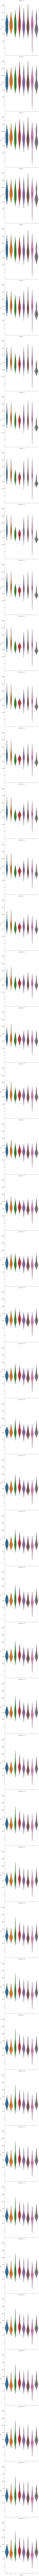

In [29]:
#sns.violinplot(x="Sample", y = "Timepoint" , data=cells_per)
g = sns.catplot(x="Stimuli", y="cells", row="Timepoint",
                data=cells_per, kind="violin", 
                height=10, aspect=0.7);


In [31]:
from src.config import FIGURES_DIR

In [32]:
g.savefig(os.path.join(FIGURES_DIR,"cell_distribution.png"))
g.savefig(os.path.join(FIGURES_DIR,"cell_distribution.pdf"))

Text(0.5, 1.0, 'Number of cells per experiment snapshot')

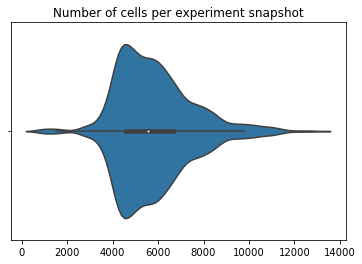

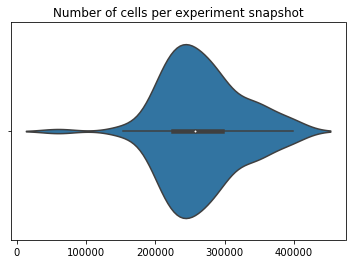

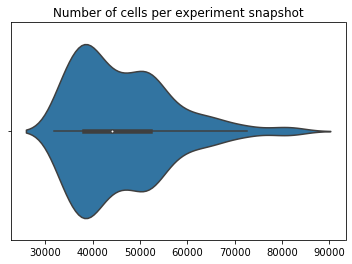

In [7]:
sns.violinplot(meta.groupby(["Stimuli","Sample", "Timepoint"]).size())
plt.title("Number of cells per experiment snapshot")

plt.figure()
sns.violinplot(meta.groupby(["Stimuli","Sample"]).size())
plt.title("Number of cells per experiment snapshot")

plt.figure()
sns.violinplot(meta.groupby(["Timepoint","Sample"]).size())
plt.title("Number of cells per timepoint")


In [30]:
meta

,Timepoint,Stimuli,Sample,Genotype,Stimuli Names
0_2G3,3,G,2,WT,Nec1s
1_2G3,3,G,2,WT,Nec1s
2_2G3,3,G,2,WT,Nec1s
3_2G3,3,G,2,WT,Nec1s
4_2G3,3,G,2,WT,Nec1s
...,...,...,...,...,...
4592_4B46,46,B,4,WT,zVD
4593_4B46,46,B,4,WT,zVD
4594_4B46,46,B,4,WT,zVD
4595_4B46,46,B,4,WT,zVD


In [169]:
data_log.groupby(["Timepoint", "Stimuli"]).size()

Timepoint  Stimuli
1          A           93760
           B           99244
           C           95455
           D          104502
           E           95131
                       ...  
46         D           61228
           E           55030
           F           51953
           G           43585
           H           56464
Length: 368, dtype: int64

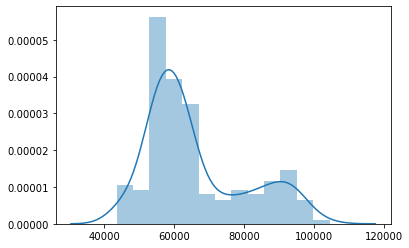

In [170]:
sns.distplot(data_log.groupby(["Timepoint", "Stimuli"]).size())

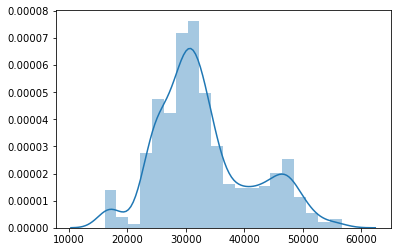

In [171]:
sns.distplot(data_log.groupby(["Timepoint", "Stimuli","Genotype"]).size())